In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
datasets = ['cora','reddit']
methods = ['EWC','MAS','GEM']
archs = ['GAT','GCN','SAGE']

In [22]:
for arch in archs:
    for method in methods:
        for dataset in datasets:
            path = './results/{}/{}_{}_5_full_batch_overall.csv'.format(dataset,arch,method)
            data = np.loadtxt(path,delimiter=',')
            print(arch,method,dataset)
            for i in range(3):
                print('{:.2f}$\pm {:.2f}$'.format(data[:,:-1].mean(axis=0)[i],data[:,:-1].std(axis=0)[i]),end=' & ')
            print()

GAT EWC cora
79.08$\pm 0.37$ & 3.74$\pm 1.48$ & 81.28$\pm 0.56$ & 
GAT EWC reddit
88.45$\pm 5.49$ & 7.67$\pm 5.15$ & 87.97$\pm 6.28$ & 
GAT MAS cora
77.69$\pm 0.39$ & 5.72$\pm 2.25$ & 79.49$\pm 0.27$ & 
GAT MAS reddit
80.48$\pm 9.33$ & 14.83$\pm 8.73$ & 79.82$\pm 9.85$ & 
GAT GEM cora
73.14$\pm 1.54$ & 11.03$\pm 3.53$ & 82.97$\pm 0.60$ & 
GAT GEM reddit
97.04$\pm 0.92$ & 1.36$\pm 0.53$ & 97.21$\pm 0.27$ & 
GCN EWC cora
81.44$\pm 0.57$ & 1.97$\pm 0.83$ & 83.60$\pm 0.66$ & 
GCN EWC reddit
97.41$\pm 0.23$ & 0.97$\pm 0.53$ & 97.65$\pm 0.18$ & 
GCN MAS cora
78.90$\pm 0.55$ & 4.27$\pm 1.39$ & 80.90$\pm 0.54$ & 
GCN MAS reddit
95.63$\pm 0.64$ & 2.54$\pm 0.84$ & 95.70$\pm 0.62$ & 
GCN GEM cora
73.74$\pm 1.53$ & 12.40$\pm 3.17$ & 85.32$\pm 0.70$ & 
GCN GEM reddit
97.48$\pm 0.19$ & 1.17$\pm 0.45$ & 98.07$\pm 0.13$ & 
SAGE EWC cora
81.01$\pm 0.89$ & 2.23$\pm 0.83$ & 84.79$\pm 0.98$ & 
SAGE EWC reddit
97.57$\pm 0.22$ & 0.79$\pm 0.31$ & 98.13$\pm 0.14$ & 
SAGE MAS cora
79.56$\pm 0.67$ & 5.85$\pm 2.

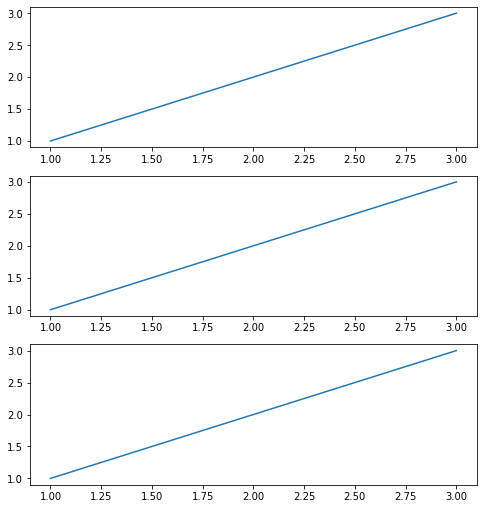

In [8]:
seeds = [2,3,4]
fig = plt.figure(figsize=(8,15))
for seed in seeds:
    path = './results/cfd/detail/HTG_Finetune_5_full_batch_{}.csv'.format(seed)
    data = pd.read_csv(path)
    # print(data)
    ax = plt.subplot(int(f'51{seed}'))
    ax.plot([1,2,3],[1,2,3])
# plt.plot()
plt.show()

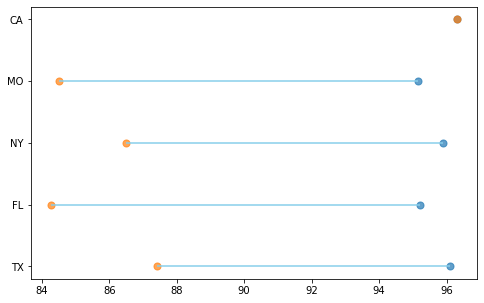

In [35]:
path = './results/cfd/detail/HTG_Finetune_5_full_batch_2.csv'
data = pd.read_csv(path)
fig = plt.figure(figsize=(8,5))
best = data.loc[data.task == data.stage,'accuracy']
last = data.loc[data.stage == 4, 'accuracy']
path = './results/cfd/HTG_Finetune_5_full_batch_overall.csv'
head = pd.read_csv(path,header=None).iloc[1,4]
city = head.split('->')
city = [i[-2:] for i in city]
y = [i for i in range(5)]
plt.scatter(best,y,s=50,alpha=0.7)
plt.scatter(last,y,s=50,alpha=0.7)
plt.yticks(y, city)
for i in y:
    plt.hlines(i,xmin=last.iloc[i],xmax=best.iloc[i],color='skyblue')

plt.show()

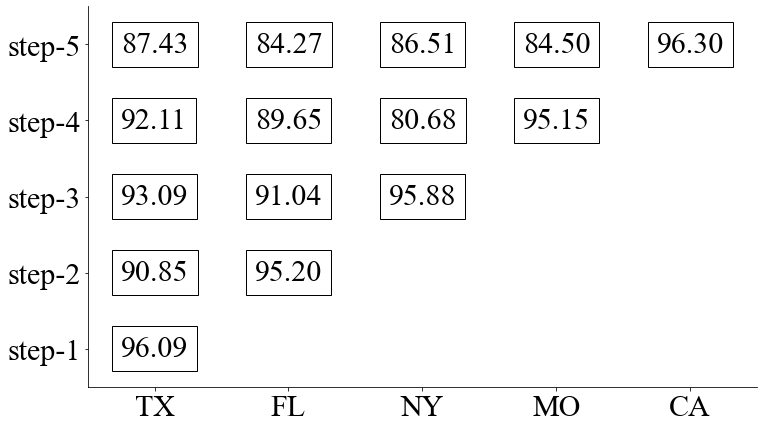

In [93]:
plt.rc('font',family='Times New Roman')
plt.rc('font',size=30)
plt.rc('lines',linewidth=5)
fig = plt.figure(figsize=(12,7))
ax = plt.gca()
y = [i+1 for i in range(5)]
plt.yticks(y, ['step-{}'.format(i) for i in y])
plt.xticks(y, city)
plt.xlim(0.5,5.5)
plt.ylim(0.5,5.5)
for stage in range(5):
    for task in range(stage+1):
        plt.text(task+0.75,stage+0.9,'{:.2f}'.format(data.loc[(data.stage == stage) & (data.task == task),'accuracy'].item()),
            bbox=dict(boxstyle="square",
                   ec=(0, 0, 0),
                   fc=(1, 1, 1),
                   ))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.show()

In [75]:
data.loc[(data.stage == 1) & (data.task == 1),'accuracy']

2    95.2
Name: accuracy, dtype: float64

In [79]:
data.loc[(data.stage == stage) & (data.task == task),'accuracy'].item()

96.09